In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gabrielsantello/cars-purchase-decision-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.13k/6.13k [00:00<00:00, 8.01MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gabrielsantello/cars-purchase-decision-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from IPython.display import Image
import os

print("Dataset path:", path)
print("Files inside path:", os.listdir(path))

Dataset path: /root/.cache/kagglehub/datasets/gabrielsantello/cars-purchase-decision-dataset/versions/1
Files inside path: ['car_data.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "car_data.csv"), encoding='ISO-8859-1')
df.head()

,ï»¿User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
print(df.describe())
df.shape
df.info()

        ï»¿User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ï»¿User ID    1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df = pd.get_dummies(df,columns=['Gender'],drop_first=True,dtype=np.int64)
df.head()

,ï»¿User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1


In [ ]:
df.isnull().sum()

,0
ï»¿User ID,0
Age,0
AnnualSalary,0
Purchased,0
Gender_Male,0


In [ ]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
decision  = DecisionTreeClassifier(criterion='gini',random_state=1)
decision.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print(decision.score(x_train,y_train))
print(decision.score(x_test,y_test))

1.0
0.87


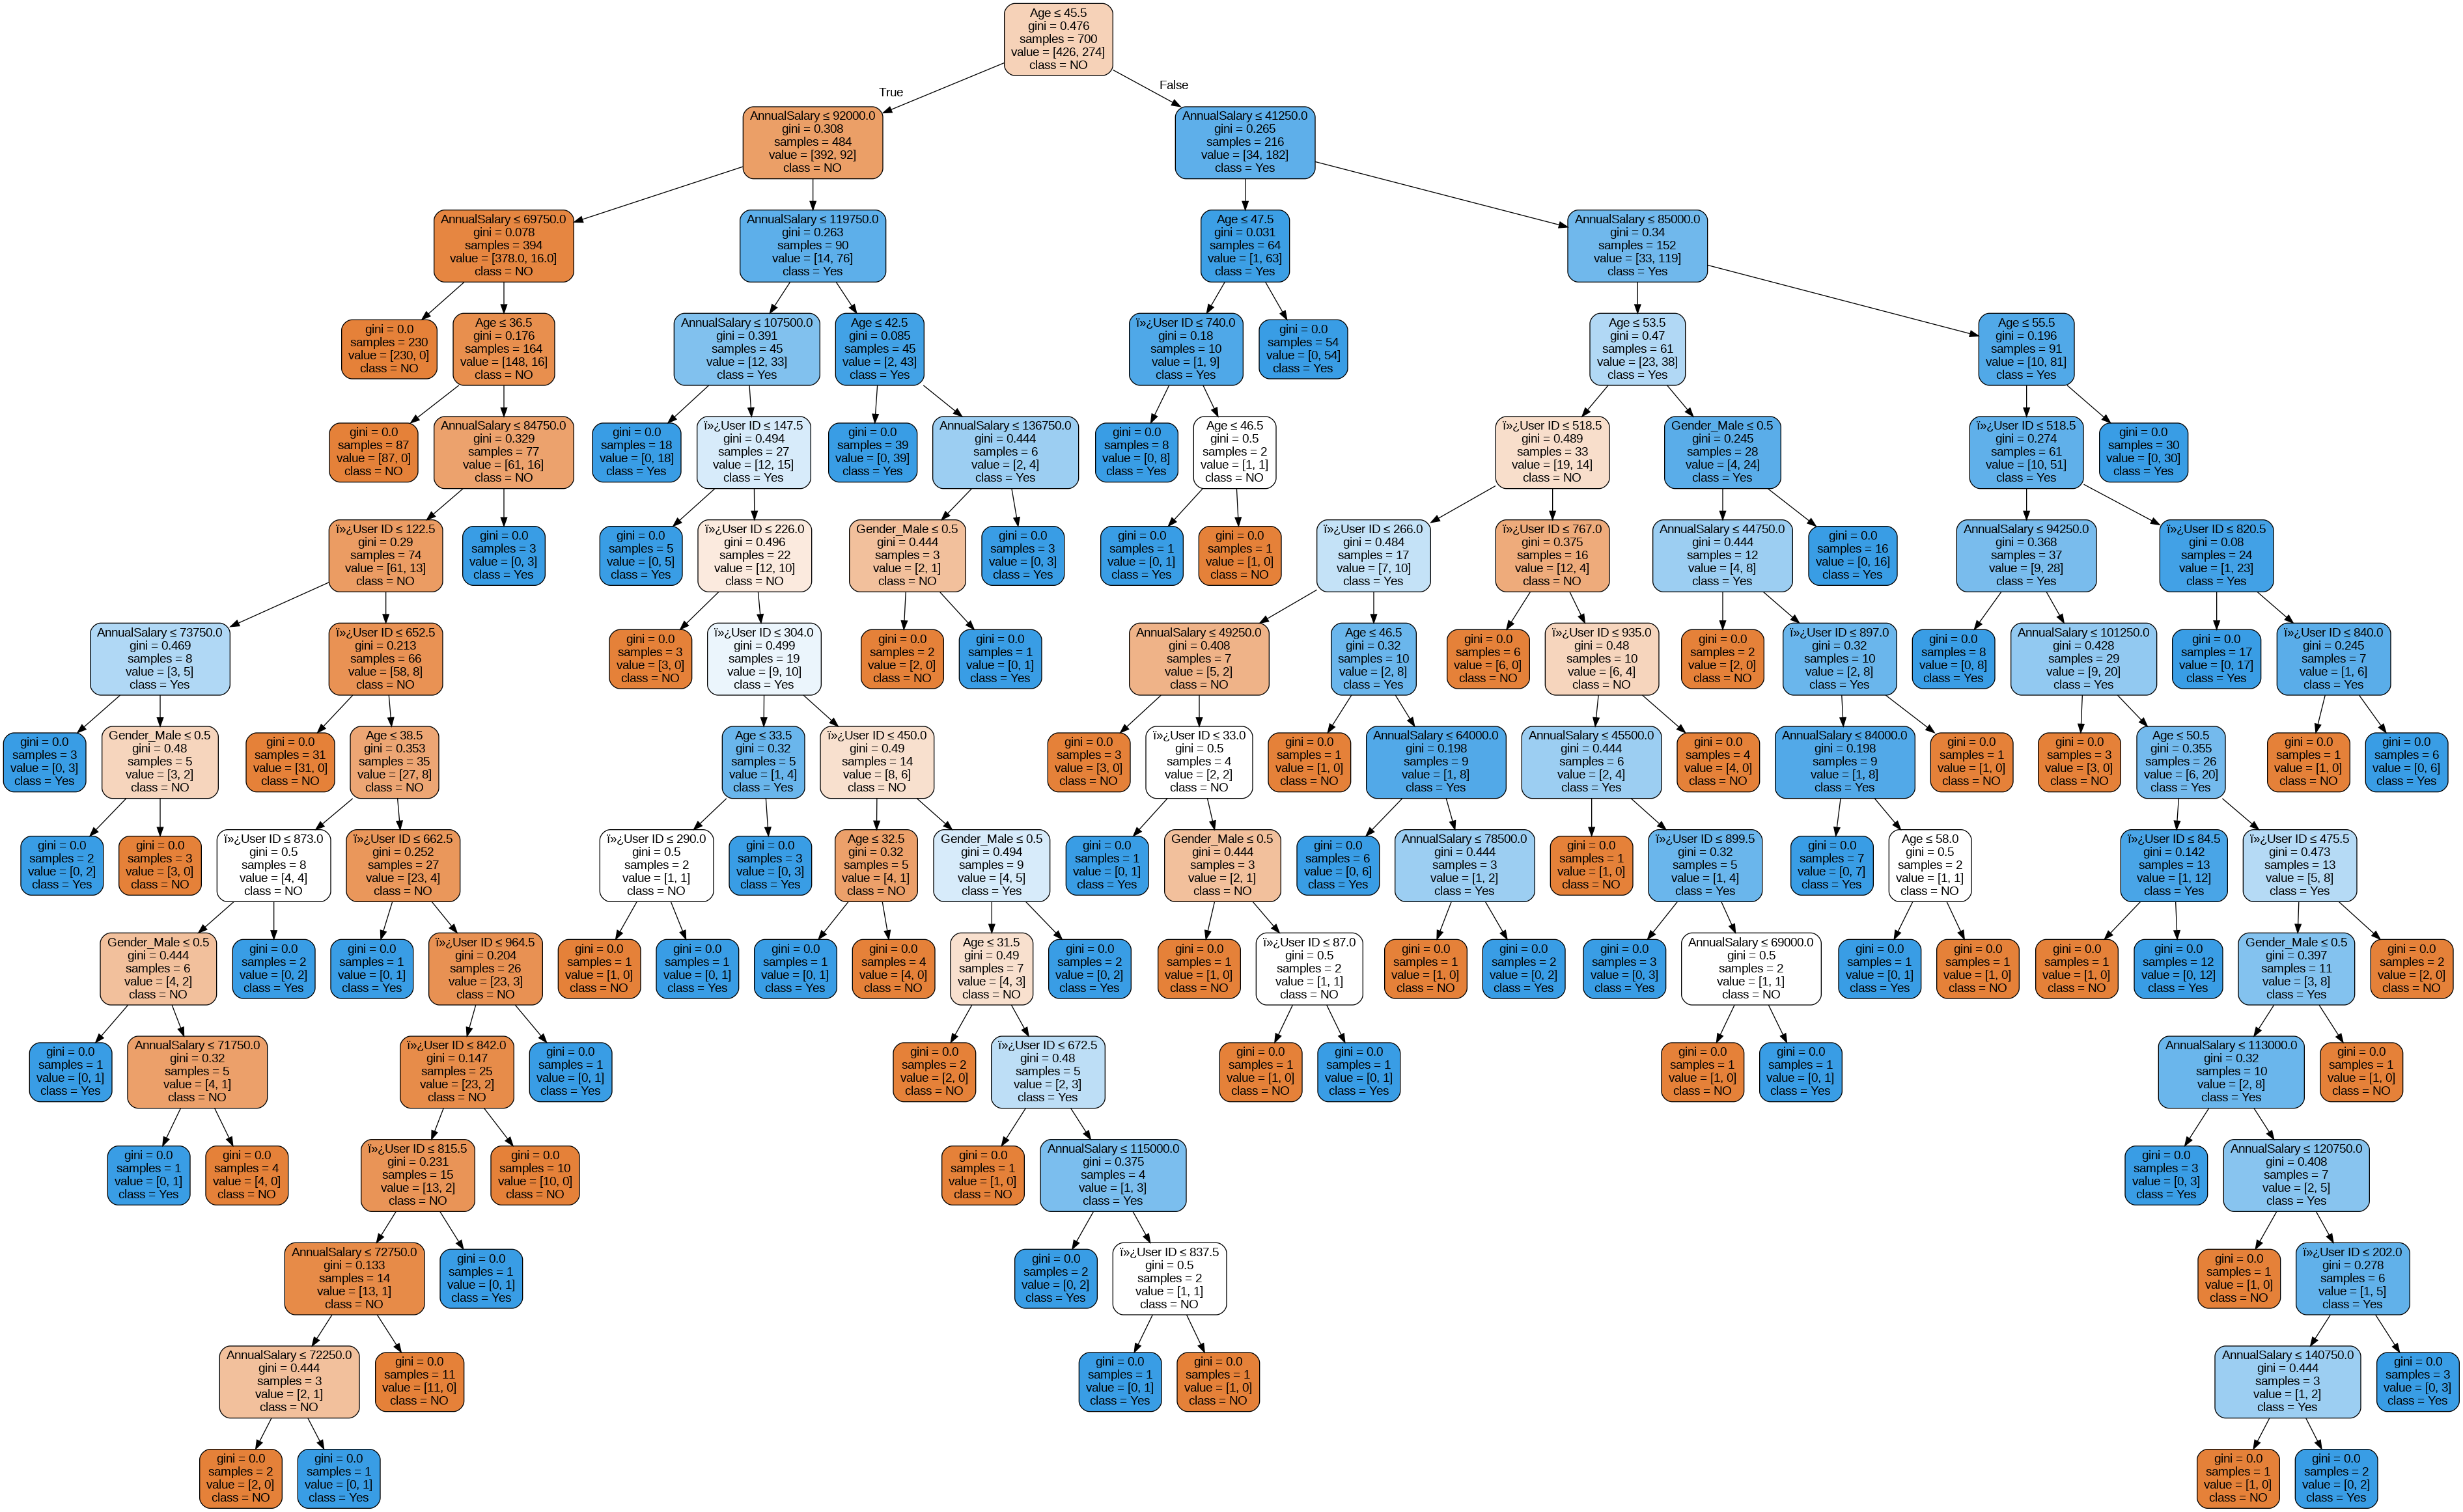

In [ ]:
train_char_label = ["NO","Yes"]
credit_tree_file = open("credit_tree.dot",'w')
dot_data = tree.export_graphviz(
    decision,
    out_file="credit_tree.dot",
    feature_names=X.columns,
    class_names=train_char_label,
    filled=True,
    rounded=True,
    special_characters=True
)
credit_tree_file.close()
retCode = os.system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
  print("system command returning error:" + str(retCode))
else:
  display(Image("credit_tree.png"))

In [ ]:
decision1  = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
decision1.fit(x_train,y_train)
print(decision1.score(x_train,y_train))
print(decision1.score(x_test,y_test))

0.9085714285714286
0.8933333333333333


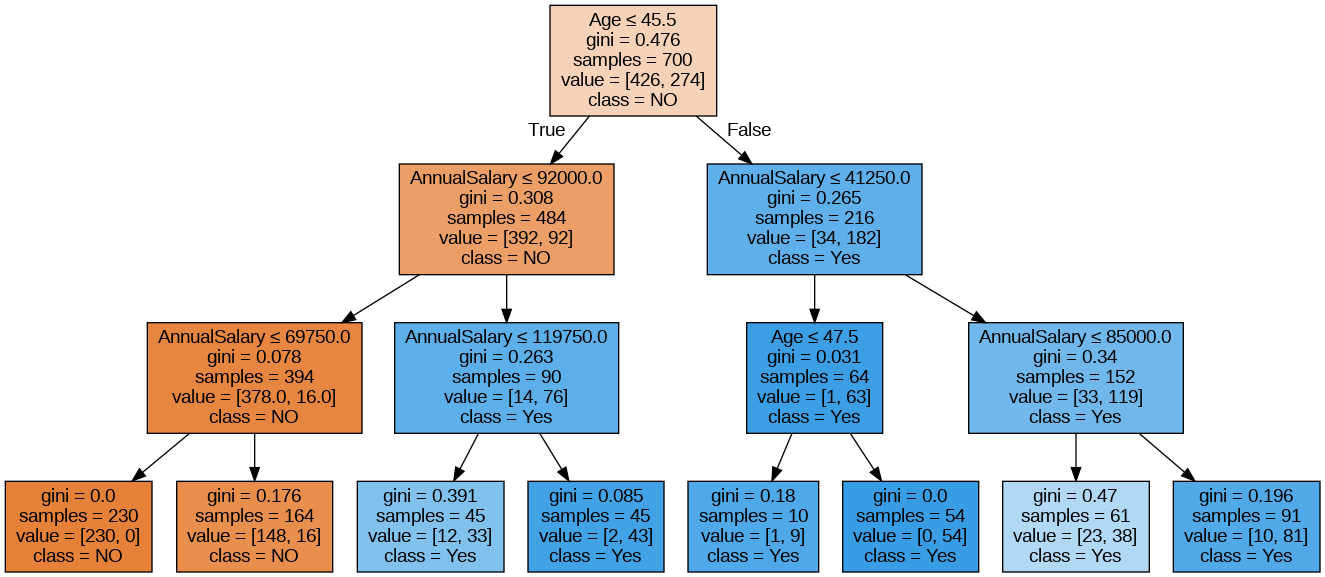

In [ ]:
train_char_label = ["NO","Yes"]
credit_tree_file = open("decision1.dot",'w')
dot_data = tree.export_graphviz(
    decision1,
    out_file="decision1.dot",
    feature_names=X.columns,
    class_names=train_char_label,
    filled=True,
    rounded=False,
    special_characters=True
)
credit_tree_file.close()
retCode = os.system("dot -Tpng decision1.dot -o decision1.png")
if(retCode>0):
  print("system command returning error:" + str(retCode))
else:
  display(Image("decision1.png"))